# Projeto de análise de dados de vendas do Diwali

O Diwali é um grande feriado indiano e um importante festival para o hinduísmo, o sikhismo, o budismo e o jainismo.

In [1]:
# importar bibliotecas python
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizando dados
%matplotlib inline
import seaborn as sns

In [2]:
# importar arquivo csv
df_diwali = pd.read_csv('Dados de vendas de Diwali.csv', encoding= 'unicode_escape')

In [3]:
df_diwali.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
# renomear colunas
df_diwali = df_diwali.rename(columns= {'User_ID':'ID_usuario','Cust_name':'Nome_cliente','Product_ID':'ID_produto','Gender':'Gênero','Age Group':'Faixa_etária','Age':'Idade','Marital_Status':'Estado_civil','State':'Estado','Zone':'Zona','Occupation':'Ocupacao','Product_Category':'Categoria_produto','Orders':'Pedido','Amount':'Quantia'})

In [5]:
df_diwali.columns

Index(['ID_usuario', 'Nome_cliente', 'ID_produto', 'Gênero', 'Faixa_etária',
       'Idade', 'Estado_civil', 'Estado', 'Zona', 'Ocupacao',
       'Categoria_produto', 'Pedido', 'Quantia', 'Status', 'unnamed1'],
      dtype='object')

In [6]:
df_diwali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_usuario         11251 non-null  int64  
 1   Nome_cliente       11251 non-null  object 
 2   ID_produto         11251 non-null  object 
 3   Gênero             11251 non-null  object 
 4   Faixa_etária       11251 non-null  object 
 5   Idade              11251 non-null  int64  
 6   Estado_civil       11251 non-null  int64  
 7   Estado             11251 non-null  object 
 8   Zona               11251 non-null  object 
 9   Ocupacao           11251 non-null  object 
 10  Categoria_produto  11251 non-null  object 
 11  Pedido             11251 non-null  int64  
 12  Quantia            11239 non-null  float64
 13  Status             0 non-null      float64
 14  unnamed1           0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# descartar colunas não relacionadas/em branco
df_diwali.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [8]:
# verifique se há valores nulos
pd.isnull(df_diwali).sum()

ID_usuario            0
Nome_cliente          0
ID_produto            0
Gênero                0
Faixa_etária          0
Idade                 0
Estado_civil          0
Estado                0
Zona                  0
Ocupacao              0
Categoria_produto     0
Pedido                0
Quantia              12
dtype: int64

In [9]:
# descartar valores nulos
df_diwali.dropna(inplace=True)

In [10]:
# alterar o tipo de dados de float para inteiro
df_diwali['Quantia'] = df_diwali['Quantia'].astype('int')

In [11]:
# verificando se a alteração do tipo de dado ocorreu 
df_diwali['Quantia'].dtypes

dtype('int32')

In [12]:
# Verificando a quantidade de linhas e colunas que ficaram depois das exclusões
df_diwali.shape

(11239, 13)

In [13]:
# O método describe () retorna a descrição dos dados no DataFrame (ou seja, contagem, média, std, etc)
df_diwali.describe()

,ID_usuario,Idade,Estado_civil,Pedido,Quantia
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Análise exploratória de dados

### Gênero

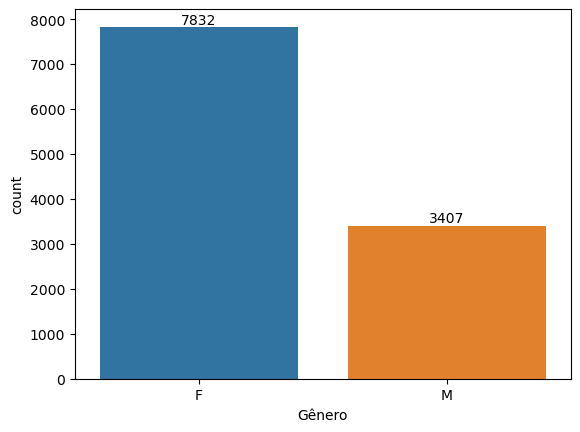

In [14]:
# Plotando um gráfico de barras por Gênero x Quantidade total
ax = sns.countplot(x = 'Gênero', data = df_diwali)

# Criando rótulo de dados com a quantidade total de cada gênero
for barras in ax.containers:
    ax.bar_label(barras)

  Gênero   Quantia
0      F  74335853
1      M  31913276


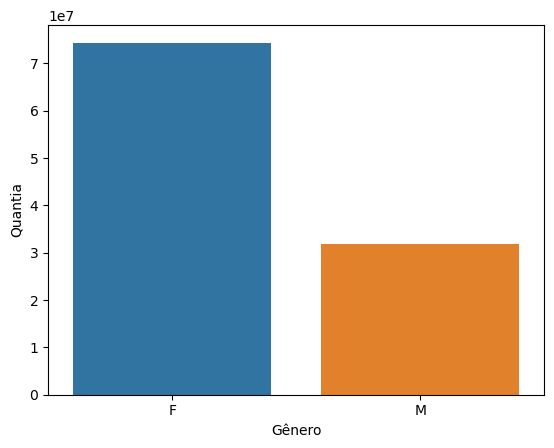

In [15]:
# Agrupando por gênero e realizando o somatório da quantia (total). Ordenando pela quantia total em ordem decrescente. (as_index = False = Não está resetando o indice)
quantia_genero = df_diwali.groupby(['Gênero'], as_index=False)['Quantia'].sum().sort_values(by='Quantia', ascending=False)
print(quantia_genero)

# Plotando um gráfico de barras por Gênero x quantia total
sns.barplot(x = 'Gênero',y = 'Quantia', data = quantia_genero);

*Nos gráficos acima, podemos ver que a maioria dos compradores são mulheres e até o poder de compra das mulheres é maior que o dos homens*

### Idade

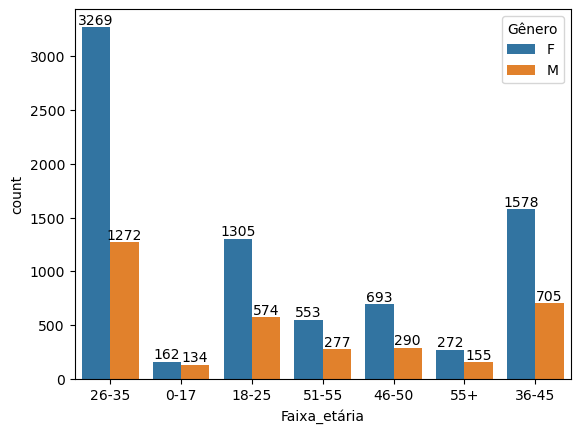

In [16]:
# Plotando um gráfico de barras por Faixa etária e sua respectivas quantidades totais. Dividas por gênero (hue = 'Gênero' = Matiz = Cor = Legenda do gráfico)
ax = sns.countplot(data = df_diwali, x = 'Faixa_etária', hue = 'Gênero')

# Criando rótulo de dados com a quantidade total de cada Faixa etária dividida por gênero
for barras in ax.containers:
    ax.bar_label(barras)

  Faixa_etária   Quantia
2        26-35  42613442
3        36-45  22144994
1        18-25  17240732
4        46-50   9207844
5        51-55   8261477
6          55+   4080987
0         0-17   2699653


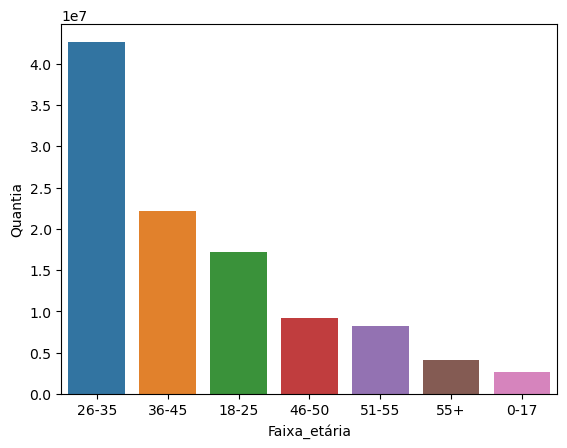

In [17]:
# Agrupando por faixa etária e realizando o somatório da quantia (total). Ordenando pela quantia total em ordem decrescente. (as_index = False = Não está resetando o indice)
quantia_idade = df_diwali.groupby(['Faixa_etária'], as_index=False)['Quantia'].sum().sort_values(by='Quantia', ascending=False)
print(quantia_idade)

# Plotando um gráfico de barras por faixa etária x quantia total
sns.barplot(x = 'Faixa_etária', y = 'Quantia', data = quantia_idade);

*Nos gráficos acima, podemos ver que a maioria dos compradores está na faixa etária entre 26 e 35 anos do sexo feminino*

### Zona

       Zona  Pedido
0   Central   10623
3  Southern    6740
4   Western    4876
2  Northern    3727
1   Eastern    2015


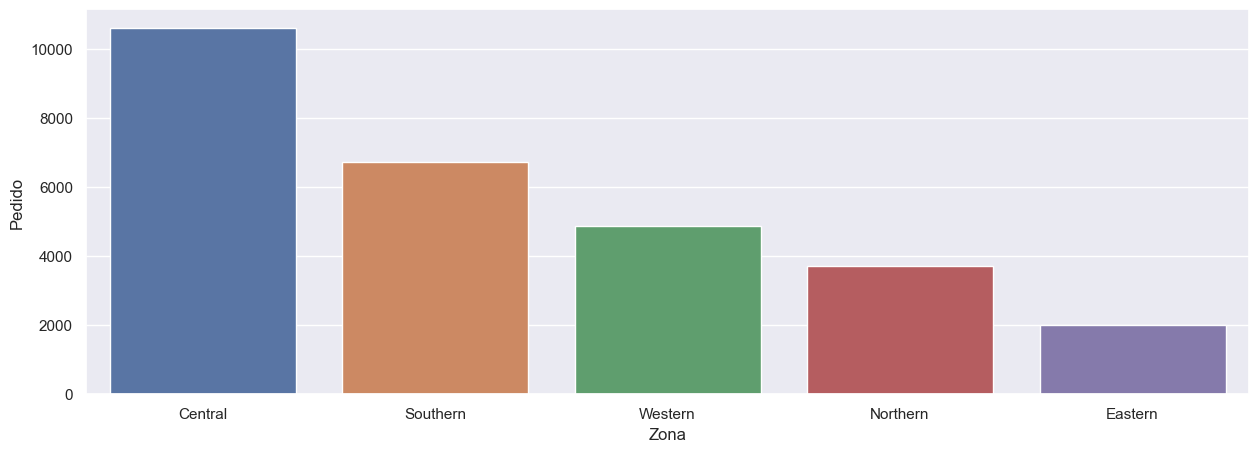

In [18]:
# Agrupando por zona e realizando o somatório da qtde de pedido. Ordenando pela qtde de pedido em ordem decrescente. (as_index = False = Não está resetando o indice)
# Mostrando os 10 primeiros principais Zonas com relação a quantidade total de pedidos
qtde_zona = df_diwali.groupby(['Zona'], as_index=False)['Pedido'].sum().sort_values(by='Pedido', ascending=False).head(10)
print(qtde_zona)

# Plotando um gráfico de barras por Zona x Quantidade total de pedidos
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = qtde_zona, x = 'Zona',y= 'Pedido');

       Zona   Quantia
0   Central  41600872
3  Southern  26606667
4   Western  18373625
2  Northern  12618752
1   Eastern   7049213


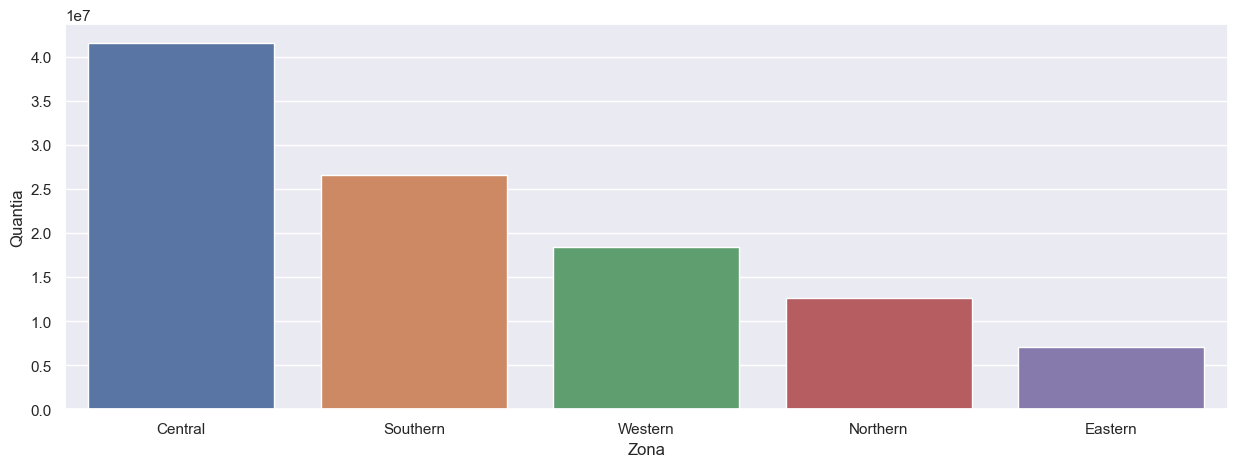

In [19]:
# Agrupando por Zona e realizando o somatório da quantia (total). Ordenando pela quantia total em ordem decrescente. (as_index = False = Não está resetando o indice)
# Mostrando os 10 primeiros principais Zonas com relação a quantia total 
quantia_zona = df_diwali.groupby(['Zona'], as_index=False)['Quantia'].sum().sort_values(by='Quantia', ascending=False).head(10)
print(quantia_zona)

# Plotando um gráfico de barras por Zona x quantia total
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = quantia_zona, x = 'Zona',y= 'Quantia');

### Estado

              Estado  Pedido
14     Uttar Pradesh    4807
10       Maharashtra    3810
7          Karnataka    3240
2              Delhi    2740
9     Madhya Pradesh    2252
0     Andhra Pradesh    2051
5   Himachal Pradesh    1568
8             Kerala    1137
4            Haryana    1109
3            Gujarat    1066


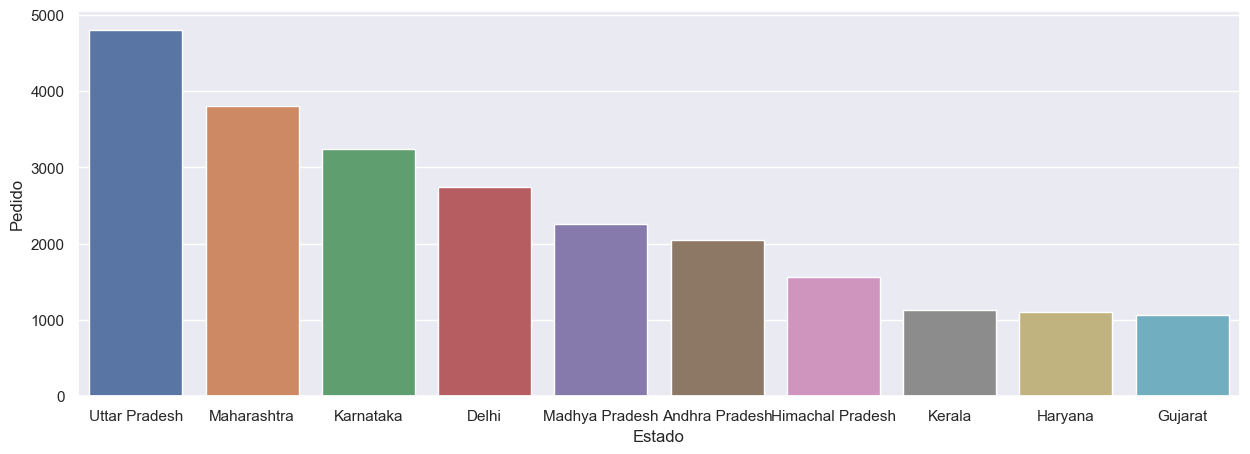

In [20]:
# Agrupando por estado e realizando o somatório da qtde de pedido. Ordenando pela qtde de pedido em ordem decrescente. (as_index = False = Não está resetando o indice)
# Mostrando os 10 primeiros principais estados com relação a quantidade total de pedidos
qtde_estado = df_diwali.groupby(['Estado'], as_index=False)['Pedido'].sum().sort_values(by='Pedido', ascending=False).head(10)
print(qtde_estado)

# Plotando um gráfico de barras por Estado x Quantidade total de pedidos
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = qtde_estado, x = 'Estado',y= 'Pedido');

              Estado   Quantia
14     Uttar Pradesh  19374968
10       Maharashtra  14427543
7          Karnataka  13523540
2              Delhi  11603818
9     Madhya Pradesh   8101142
0     Andhra Pradesh   8037146
5   Himachal Pradesh   4963368
4            Haryana   4220175
1              Bihar   4022757
3            Gujarat   3946082


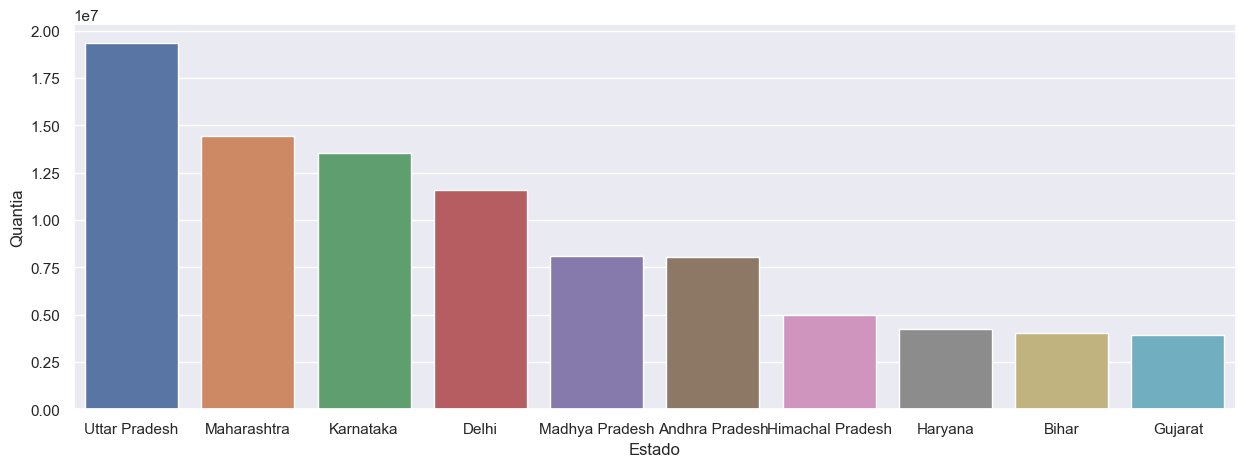

In [21]:
# Agrupando por estado e realizando o somatório da quantia (total). Ordenando pela quantia total em ordem decrescente. (as_index = False = Não está resetando o indice)
# Mostrando os 10 primeiros principais estados com relação a quantia total 
quantia_estado = df_diwali.groupby(['Estado'], as_index=False)['Quantia'].sum().sort_values(by='Quantia', ascending=False).head(10)
print(quantia_estado)

# Plotando um gráfico de barras por Estado x quantia total
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = quantia_estado, x = 'Estado',y= 'Quantia');

*Nos gráficos acima, podemos ver que a maioria dos pedidos e vendas totais/valor são de Uttar Pradesh, Maharashtra e Karnataka, respectivamente*


### Estado civil

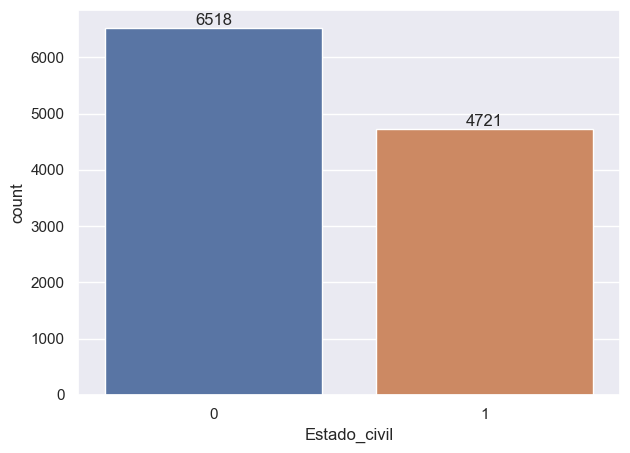

In [22]:
# Plotando um gráfico de barras por Estado civil e sua respectivas quantidades totais. 
sns.set(rc={'figure.figsize':(7,5)})
ax = sns.countplot(data = df_diwali, x = 'Estado_civil')

# Criando rótulo de dados com a quantidade total por Estado civil 
for barras in ax.containers:
    ax.bar_label(barras)

   Estado_civil Gênero   Quantia
0             0      F  43786646
2             1      F  30549207
1             0      M  18338738
3             1      M  13574538


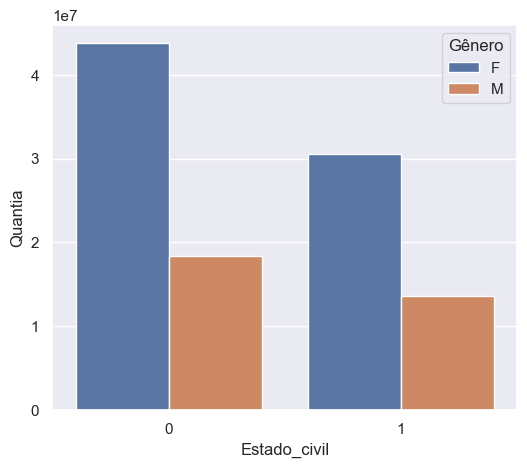

In [23]:
# Agrupando por Estado civil e Gênero e realizando o somatório da quantia (total). Ordenando pela quantia total em ordem decrescente. (as_index = False = Não está resetando o indice)
quantia_estado = df_diwali.groupby(['Estado_civil', 'Gênero'], as_index=False)['Quantia'].sum().sort_values(by='Quantia', ascending=False)
print(quantia_estado)

# Plotando um gráfico de barras por Estado civil x quantia total
# Dividas por gênero (hue = 'Gênero' = Matiz = Cor = Legenda do gráfico)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = quantia_estado, x = 'Estado_civil', y = 'Quantia', hue = 'Gênero');

*Nos gráficos acima podemos ver que a maioria dos compradores são casados (mulheres) e possuem alto poder aquisitivo*

### Ocupação

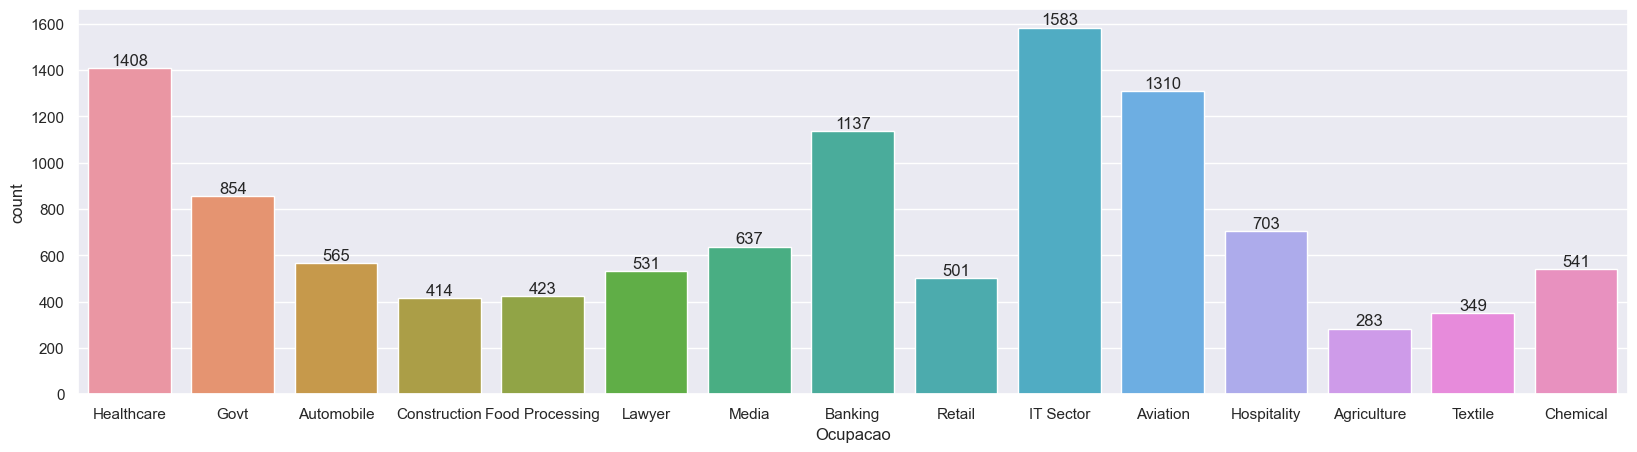

In [24]:
# Plotando um gráfico de barras por Ocupacao e sua respectivas quantidades totais. 
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df_diwali, x = 'Ocupacao')

# Criando rótulo de dados com a quantidade total por Ocupacao
for barras in ax.containers:
    ax.bar_label(barras)

           Ocupacao   Quantia
10        IT Sector  14755079
8        Healthcare  13034586
2          Aviation  12602298
3           Banking  10770610
7              Govt   8517212
9       Hospitality   6376405
12            Media   6295832
1        Automobile   5368596
4          Chemical   5297436
11           Lawyer   4981665
13           Retail   4783170
6   Food Processing   4070670
5      Construction   3597511
14          Textile   3204972
0       Agriculture   2593087


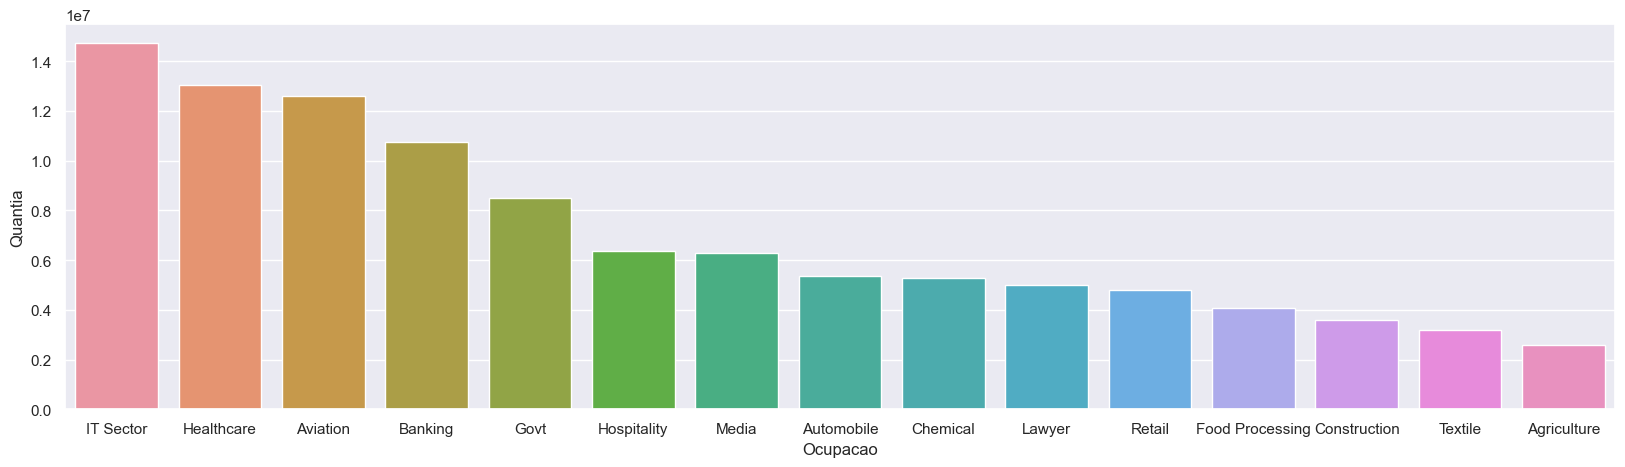

In [25]:
# Agrupando por Ocupacao e realizando o somatório da quantia (total). Ordenando pela quantia total em ordem decrescente. (as_index = False = Não está resetando o indice)
quantia_ocupacao = df_diwali.groupby(['Ocupacao'], as_index=False)['Quantia'].sum().sort_values(by='Quantia', ascending=False)
print(quantia_ocupacao)

# Plotando um gráfico de barras por Ocupacao x quantia total
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = quantia_ocupacao, x = 'Ocupacao',y= 'Quantia');

*Nos gráficos acima, podemos ver que a maioria dos compradores trabalha nos setores de TI, saúde e aviação*

### Categoria de Produto

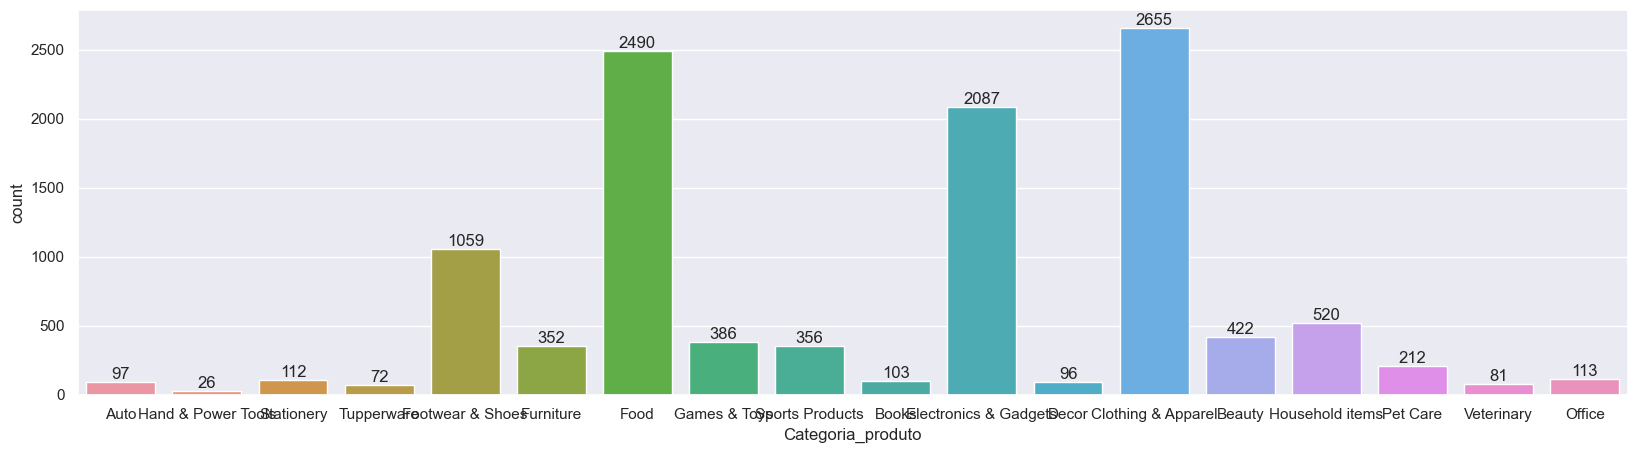

In [26]:
# Plotando um gráfico de barras por categoria do produto e sua respectivas quantidades totais. 
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df_diwali, x = 'Categoria_produto')

# Criando rótulo de dados com a quantidade total por categoria do produto
for barras in ax.containers:
    ax.bar_label(barras)

        Categoria_produto   Quantia
6                    Food  33933883
3      Clothing & Apparel  16495019
5   Electronics & Gadgets  15643846
7        Footwear & Shoes  15575209
8               Furniture   5440051
9            Games & Toys   4331694
14        Sports Products   3635933
1                  Beauty   1959484
0                    Auto   1958609
15             Stationery   1676051


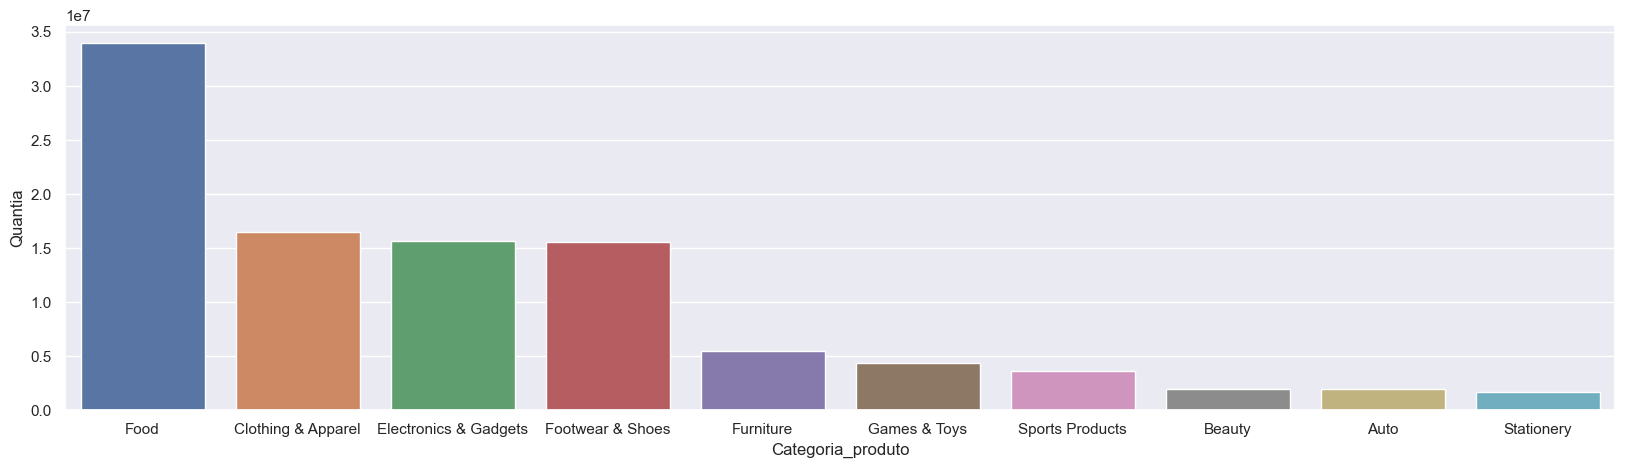

In [27]:
# Agrupando por Categoria do produto e realizando o somatório da quantia (total). Ordenando pela quantia total em ordem decrescente. (as_index = False = Não está resetando o indice)
# Mostrando os 10 primeiros principais Categoria do produto com relação a quantia total 
quantia_categoria_produto = df_diwali.groupby(['Categoria_produto'], as_index=False)['Quantia'].sum().sort_values(by='Quantia', ascending=False).head(10)
print(quantia_categoria_produto)

# Plotando um gráfico de barras por Categoria do produto x quantia total
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = quantia_categoria_produto, x = 'Categoria_produto',y= 'Quantia');

*Nos gráficos acima podemos ver que a maioria dos produtos vendidos são da categoria Alimentos, Vestuário e Eletrônicos*

### Produto

     ID_produto  Pedido
1679  P00265242     127
644   P00110942     116
1504  P00237542      91
1146  P00184942      82
679   P00114942      79
171   P00025442      79
708   P00117942      76
888   P00145042      76
298   P00044442      75
643   P00110842      74


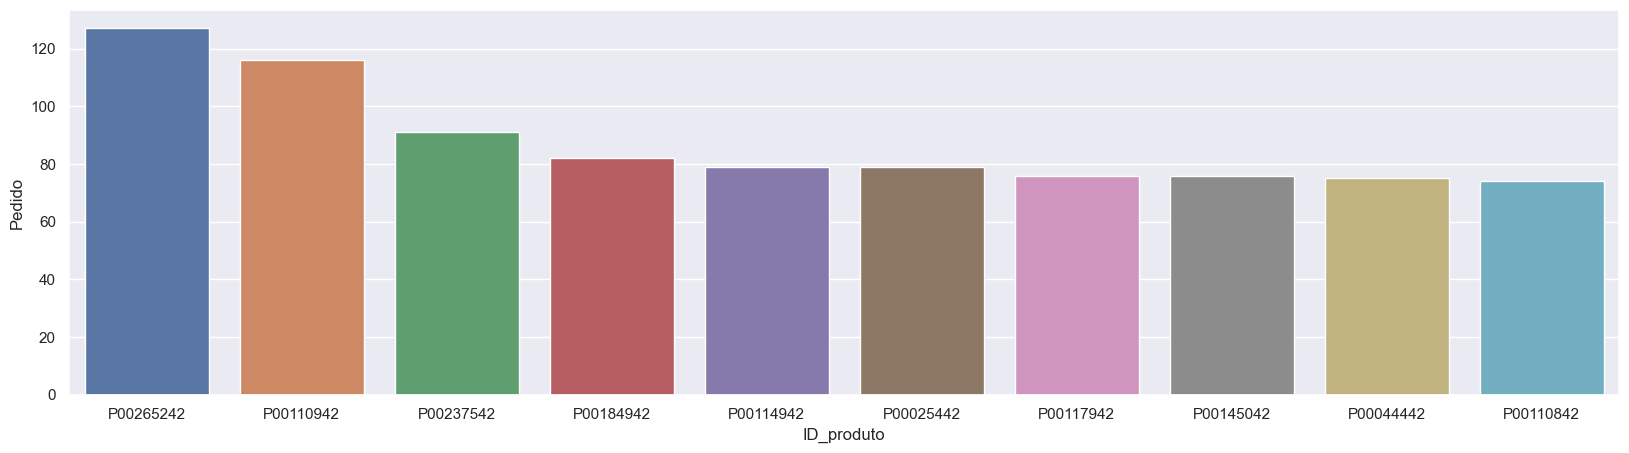

In [28]:
# Modo 1

# Agrupando pelo Id do produto e realizando o somatório da quantidade de pedido. Ordenando pelo pedido total em ordem decrescente. (as_index = False = Não está resetando o indice)
# Mostrando os 10 primeiros principais produto com relação a quantidade total de pedido
qtde_produto = df_diwali.groupby(['ID_produto'], as_index=False)['Pedido'].sum().sort_values(by='Pedido', ascending=False).head(10)
print(qtde_produto)

# Plotando um gráfico de barras por Produto x quantidade total de pedido
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = qtde_produto, x = 'ID_produto', y= 'Pedido');

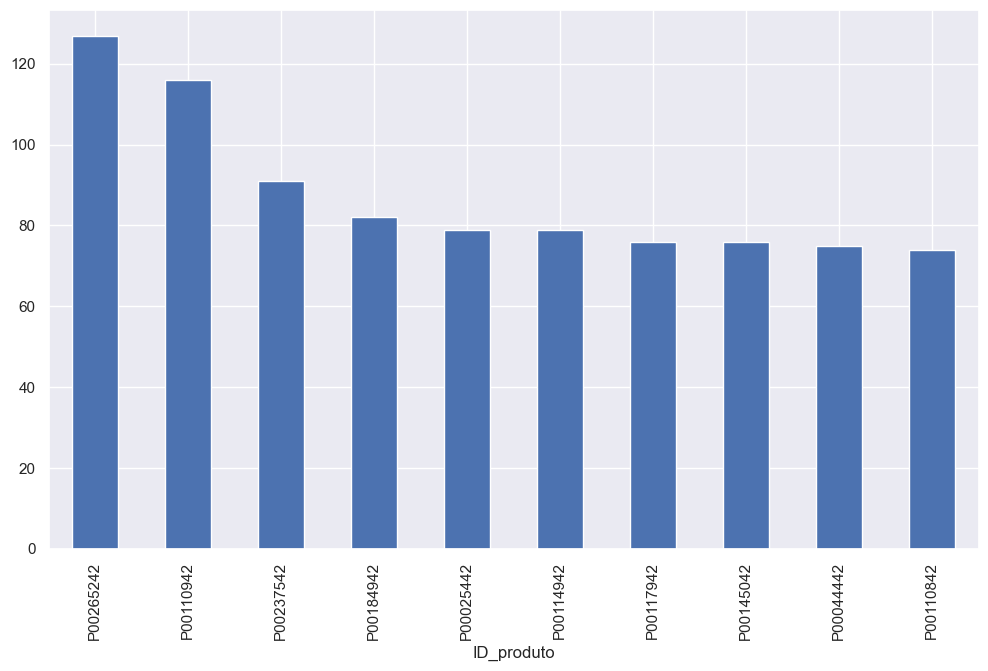

In [29]:
# Modo 2

# Plotando um gráfico de barras por Produto x quantidade total de pedido, porém exibindo os 10 produtos mais vendidos
# Agrupando pelo Produto e realizando o somatório da quantidade de pedido. nlargest(10) = retorna as primeiras 10 linhas ordenadas por colunas em ordem decrescente.
fig1, ax1 = plt.subplots(figsize=(12,7))
df_diwali.groupby('ID_produto')['Pedido'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar');

## Conclusão:

### Público alvo = Público que mais compra no festival indiano:
* Mulheres casadas de 26 a 35 anos 
* Moram nos estados UP, Maharastra e Karnataka e nas zonas Central, Southern e Western
* Trabalham em TI, Saúde e Aviação 
* têm maior probabilidade de comprar produtos da categoria Alimentos, Vestuário e Eletrônicos